# Tarea 1
*Autores: Pablo Montes y Oscar Reula*
### Importante 1: ###
Este notebook está diseñado para ejecutar en Julia.

### Importante 2: ###
Renombre el archivo como: 
**apellido_nombre_tarea_1.ipynb**

**Todo el código generado y la presentación deberá estar incluida en este notebook.**

**El objetivo de las primeras tareas es variado:**

1. Construir algunos integradores simples y aplicarlos a problemas en 1 y 2 dimensiones.
2. Estudiar convergencia y determinar el factor Q del método.
3. Estudia la región de convergencia de los métodos.
4. Comprobar cualitativa y cuantitativamente los errores de la aproximación.
5. Familiarizarse con las librerías de integradores de ODEs.
6. Familiarizarse con el manejo y estudio de soluciones para casos de complejidad media.
7. Estudiar el caso stiff y los métodos IMEX.

**1)** La ecuación diferencial

$$
\frac{dy}{dt} = \lambda y
$$

tiene como solución la función 
$$ y(t) = Ce^{\lambda t}, $$
donde $C$ es una constante que depende del dato inicial.

La resolveremos numéricamente utilizando el método de Euler,
$$y(t+\Delta t) \approx y(t) + \Delta t \dfrac{dy}{dt}(t) = y(t) + \Delta t \lambda y(t)$$
tomando $\lambda = 2$ y dato inicial $y(0) = 1$ en el intervalo de tiempo $[0,2]$.


**Implementación del método:**

Una forma simple de implementar el método de Euler sería la siguiente
```julia
#Datos iniciales
λ = 2
y0 = 1
#Cantidad de pasos temporales y dt
Tfin = 2.0
N = 201
dt = Tfin/(N-1)

#Vectores donde guardamos la solución
tiempos = zeros(N)
y = zeros(N)
y[1] = y0
#Evolución temporal usando el método de Euler
for i in 2:N
    tiempos[i] = dt*(i-1)      #Actualizamos el valor de t
    y[i] = y[i-1] + dt*λ*y[i]  #Hacemos un paso de Euler
end
```


Lo que haremos es partir este procedimiento en algunas funciones pequeñas, de manera que cuando en el futuro queramos cambiar de método numérico, o resolver otra ecuación diferencial, esto se pueda hacer de manera directa. Las funciones que usaremos están en el archivo ``myODEfunctions.jl``

Nuestra implementación del método de Euler entonces será la siguiente:

In [1]:
include("myODEfunctions.jl")
#1) Datos del problema:
#Definimos el término derecho de la ODE
CrecimientoExponencial(y, t, λ) = λ*(y)    
#Datos iniciales
λ = 1.0 
y0 = 1.0
#Intervalo temporal
T = (0.0, 4.0)

#Guardamos los datos en la variable "prob"
par = (λ)
prob = myODEproblem(CrecimientoExponencial, y0, T, par) 

(CrecimientoExponencial, 1.0, (0.0, 4.0), 1.0)

In [3]:
#Cantidad de pasos temporales
N = 101
#Resolvemos el problema "prob" usando el método "EulerStep" 
#discretizando con N pasos (dt = (Tfin-Tini)/(N-1))
dt = (T[2]-T[1])/(N-1)
t, y = myODEsolver(prob, EulerStep, dt = dt)

([0.0, 0.04, 0.08, 0.12, 0.16, 0.2, 0.24, 0.28, 0.32, 0.36  …  3.64, 3.68, 3.72, 3.7600000000000002, 3.8000000000000003, 3.84, 3.88, 3.92, 3.96, 4.0], [1.0; 1.04; … ; 48.5624501771821; 50.50494818426938])

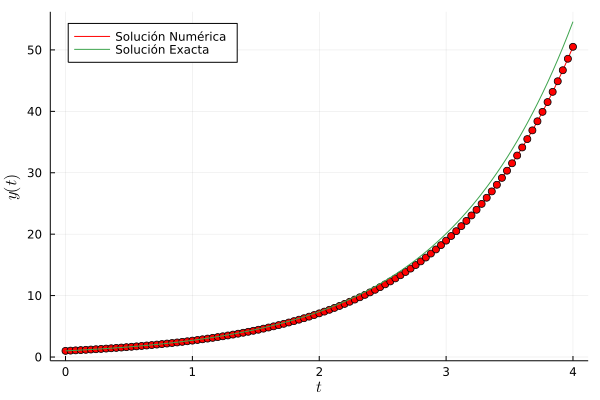

In [4]:
using Plots
gr()
plt = plot()
plot!(plt, t, y, color = :red, label = "Solución Numérica")
scatter!(plt, t, y, color = :red, label = "")
plot!(plt, t, y0*exp.(λ*t), label = "Solución Exacta")
plot!(plt, ylabel = "y", color = :blue, zlabel = "z")
plot!(ylabel = "\$y(t)\$", xlabel = "\$t\$")
plot!(plt, legend = :topleft)

***1a)*** Juegue con distintos valores de `dt` y datos iniciales. Vea que sucede a medida que aumenta o disminuye `dt`. ¿Cómo se comporta el sistema si $\lambda$ e $y_0$ son números complejos?.

*Pista: Un número complejo $c = a + bi$ se define en jula como como `c = a + bim`. Las funciones `real(c)` e `imag(c)` retornan `a` y `b` respectivamente.*

***1b)*** Utilice varios N para calcular el factor $Q$ del método de Euler.

***1c)***
Usando $\lambda = 1, y_0 = 1$, implemente los métodos de Runge-Kutta de orden 2 y 4 creando dos funciones llamdas `RK2step` y `RK4step`, similares a `EulerStep`. Vuelva a graficar para distintos $N$ y calcule el factor $Q$ para estos métodos.

***1d)*** **Estabilidad**

Considere el caso $\lambda = -1$ con `y0 = -1:0.1:1` (es decir, los casos $y_0 = 0, y_0 = 0.1,...,y_0 = 2$). Evolucione hasta $t = 10$. Pruebe con valores de $N = 50, 30, 20, 10, 5$ (es decir, con $\Delta t$ progresivamente más grande). Grafique con distintos métodos comparando con la solución exacta. ¿Qué observa?.

*Opcional*:
Pruebe en su lugar jugar con la ecuación
$$
\frac{dy}{dt} = y - y^2
$$

con `y0 = 0:0.1:2` en el intervalo $t=[0,10]$.


***2)*** **Sistemas de ecuaciones**

La ecuación diferencial ordinaria de segundo orden
$$
\dfrac{d^{2}u(t)}{dt^2} = -\alpha^{2} u(t), \quad \alpha > 0
$$

tiene como solución general $u = A\textrm{cos}(\alpha t) +  B\textrm{sen}(\alpha t)$.

Para resolverla numéricamente, podemos convertirla en un sistema de ecuaciones se ordinarias de primer orden definiendo $v = \dfrac{du}{dt}$.

$$
    \begin{array}{c}
    \dfrac{du}{dt} &= &  v \\
    \dfrac{dv}{dt} &= &-\alpha^{2} u
    \end{array}
$$

***a)*** Considere $$\alpha = 1, \quad u(0) = 1,\quad  v(0) = 0.$$ 
Grafique y compare el deseméño de los distintos métodos con la solución exacta.

*Pista: defina `y0 = [u0, v0]`*